In [10]:
!pip install duckduckgo_search

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/97.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 97.9/97.9 kB 943.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 1.4 MB/s eta 0:00:02
    --------------------------------------- 0.0/2.6 MB 393.8 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/2.6 MB 1.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/2.6 MB 1.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/2.6 MB 1.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.6 MB 1.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.6 MB 1.0 MB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.6 MB 912.8 kB/s eta 0:00:03
   ----- --------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


In [11]:
!pip install fastcore

     ---------------------------------------- 0.0/67.6 kB ? eta -:--:--
     ------------------ --------------------- 30.7/67.6 kB 1.4 MB/s eta 0:00:01
     ---------------------------------- --- 61.4/67.6 kB 825.8 kB/s eta 0:00:01
     ---------------------------------- --- 61.4/67.6 kB 825.8 kB/s eta 0:00:01
     ---------------------------------- --- 61.4/67.6 kB 825.8 kB/s eta 0:00:01
     ---------------------------------- --- 61.4/67.6 kB 825.8 kB/s eta 0:00:01
     -------------------------------------- 67.6/67.6 kB 216.4 kB/s eta 0:00:00


In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


C:\Users\chris\anaconda3\Lib\site-packages\duckduckgo_search\compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'https://images.alphacoders.com/492/492674.jpg'

In [15]:
!pip install fastdownload

In [1]:
!pip install fastai

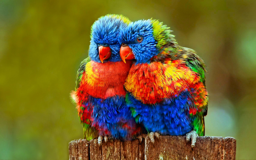

In [5]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


C:\Users\chris\anaconda3\Lib\site-packages\duckduckgo_search\compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


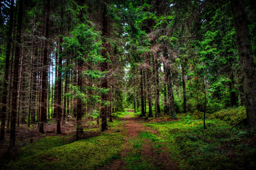

In [6]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [7]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

C:\Users\chris\anaconda3\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


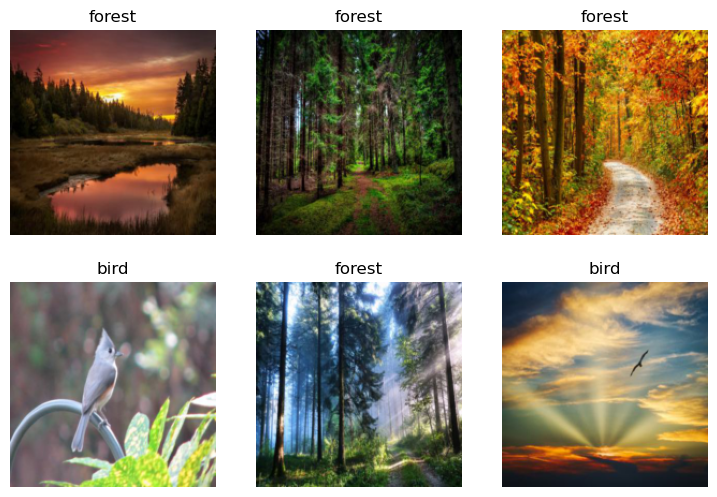

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [10]:
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=[Resize(192, method='squish')]
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\chris/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:21<00:00, 2.22MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.987893,0.504451,0.212121,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.200678,0.191765,0.030303,00:09
1,0.126349,0.151029,0.030303,00:09
2,0.083064,0.142439,0.030303,00:09


In [15]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
